<a href="https://colab.research.google.com/github/DilemmaFixer3/AI-2sem/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2026-02-19 18:39:51--  https://archive.ics.uci.edu/static/public/697/predict+students+dropout+and+academic+success.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘dataset.zip’

dataset.zip             [ <=>                ] 520.84K  --.-KB/s    in 0.1s    

2026-02-19 18:39:51 (3.77 MB/s) - ‘dataset.zip’ saved [533344]

Archive:  dataset.zip
 extracting: data.csv                


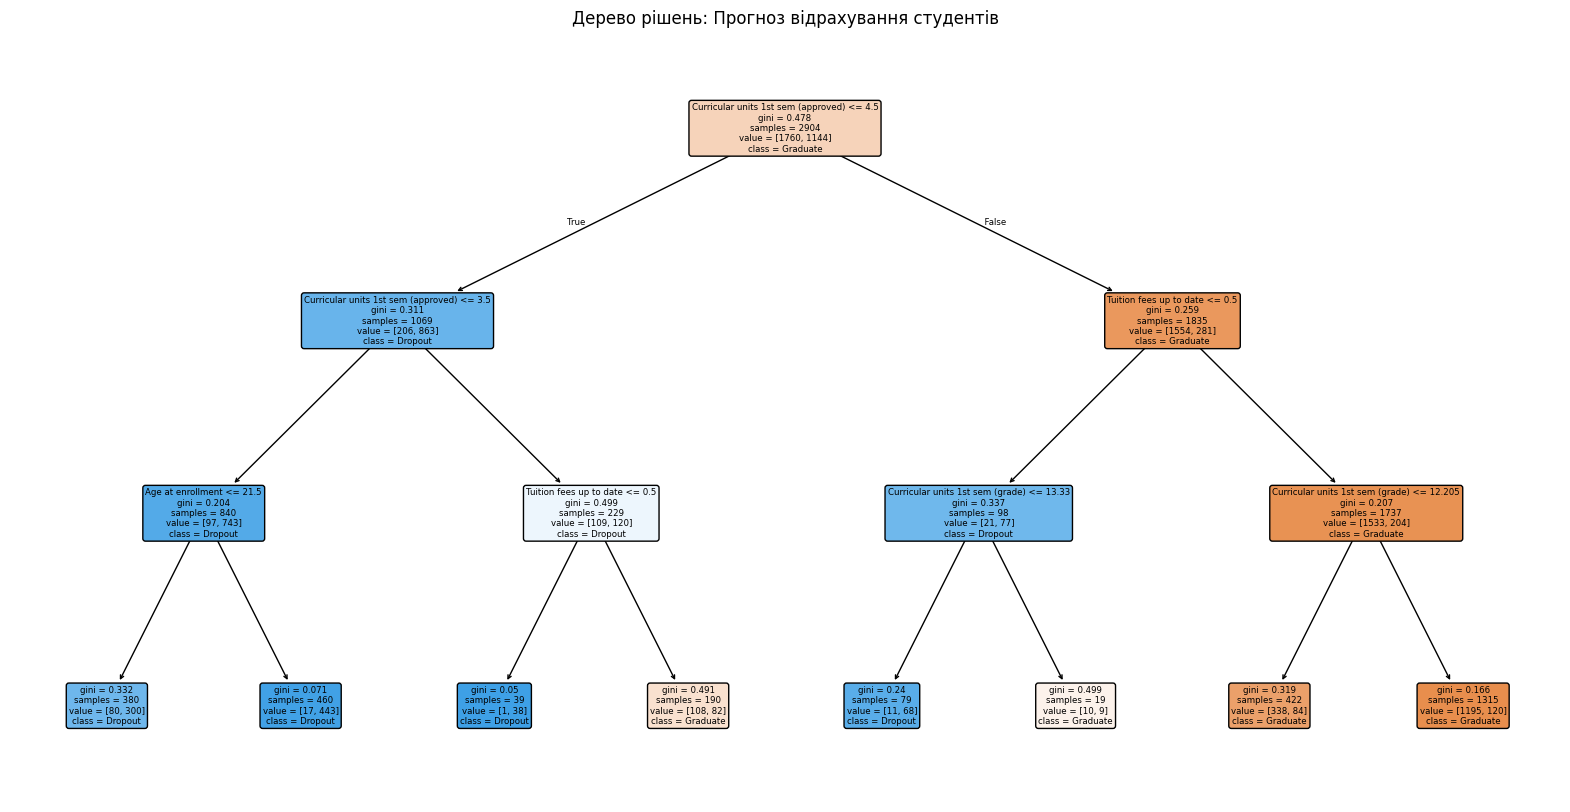

Точність моделі (Accuracy): 84.71%

Детальний аналіз (Classification Report):
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       449
           1       0.88      0.69      0.78       277

    accuracy                           0.85       726
   macro avg       0.86      0.82      0.83       726
weighted avg       0.85      0.85      0.84       726

------------------------------
 РЕЗУЛЬТАТ: Низький ризик (ймовірність відрахування 9.1%)
Рекомендація: Студент успішно опановує програму.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [4]:
# 1. Налаштування середовища та завантаження датасету
import os

# Створюємо папку для Kaggle API (якщо ти використовуєш свій kaggle.json)
# Якщо у тебе немає токена, код нижче завантажить дані за прямим посиланням для зручності
!pip install -q kaggle
!wget -O dataset.zip https://archive.ics.uci.edu/static/public/697/predict+students+dropout+and+academic+success.zip
!unzip -o dataset.zip

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# 2. Завантаження та аналіз даних (Пункт 2.1.2)
# У цьому датасеті розділювач - крапка з комою
df = pd.read_csv('data.csv', sep=';')

# Залишаємо тільки "Dropout" та "Graduate" для бінарної класифікації (Пункт 2.1.3)
df = df[df['Target'] != 'Enrolled']
df['Target'] = df['Target'].map({'Dropout': 1, 'Graduate': 0})

# 3. Формалізація задачі (Пункт 2.1.3)
# Обираємо найбільш впливові ознаки згідно з предметною областю [cite: 64, 65]
features = [
    'Curricular units 1st sem (approved)', # Успішність
    'Curricular units 1st sem (grade)',    # Оцінки [cite: 68]
    'Tuition fees up to date',             # Оплата навчання
    'Scholarship holder',                  # Наявність стипендії
    'Age at enrollment'                    # Соціально-демографічний фактор [cite: 70]
]

X = df[features]
y = df['Target']

# 4. Побудова моделі (Пункт 2.1.4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Використовуємо дерево рішень, як зазначено в роботі
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# 5. Візуалізація та оцінка (Пункт 2.1.5)
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=features, class_names=['Graduate', 'Dropout'], filled=True, rounded=True)
plt.title("Дерево рішень: Прогноз відрахування студентів")
plt.show()

y_pred = clf.predict(X_test)
print(f"Точність моделі (Accuracy): {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nДетальний аналіз (Classification Report):")
print(classification_report(y_test, y_pred))

# 6. Демонстраційний інтерфейс (Пункт 2.1.5)
# @title  Система підтримки прийняття рішень: Перевірка ризику
# @markdown Введіть дані студента для аналізу:

sem1_approved = 5 # @param {type:"slider", min:0, max:20, step:1}
sem1_grade = 14 # @param {type:"slider", min:0, max:20, step:0.1}
tuition_ok = "Yes" # @param ["Yes", "No"]
scholarship = "Yes" # @param ["Yes", "No"]
age = 19 # @param {type:"integer"}

# Перетворення вхідних даних
input_data = [[
    sem1_approved,
    sem1_grade,
    1 if tuition_ok == "Yes" else 0,
    1 if scholarship == "Yes" else 0,
    age
]]

prediction = clf.predict(input_data)
probability = clf.predict_proba(input_data)[0][1]

print("-" * 30)
if prediction[0] == 1:
    print(f" РЕЗУЛЬТАТ: Високий ризик відрахування (ймовірність {probability*100:.1f}%)")
    print("Рекомендація: Призначити консультацію з куратором.")
else:
    print(f" РЕЗУЛЬТАТ: Низький ризик (ймовірність відрахування {probability*100:.1f}%)")
    print("Рекомендація: Студент успішно опановує програму.")